In [1]:
import pandas as pd

In [2]:
train = pd.read_csv(
    filepath_or_buffer="../data/train.csv", 
    )

In [3]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


#### Check imbalance problem

In [4]:
print("real disaster     : ",len(train[train["target"] == 1])/len(train))
print("not real disaster : ",len(train[train["target"] != 1])/len(train))

real disaster     :  0.4296597924602653
not real disaster :  0.5703402075397347


#### 문장 길이에 따른 y값

In [5]:
from torchtext.data.utils import get_tokenizer
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train["text_len"] = train["text"].apply(len)
tokenizer = get_tokenizer("basic_english")
train["tokenize_text"] = train["text"].apply(tokenizer)
train["tokenize_text_len"] = train["tokenize_text"].apply(len)

In [8]:
train

,id,keyword,location,text,target,text_len,tokenize_text,tokenize_text_len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,"[our, deeds, are, the, reason, of, this, #eart...",13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,"[forest, fire, near, la, ronge, sask, ., canada]",8
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,"[all, residents, asked, to, ', shelter, in, pl...",25
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,"[13, ,, 000, people, receive, #wildfires, evac...",10
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,"[just, got, sent, this, photo, from, ruby, #al...",16
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,"[two, giant, cranes, holding, a, bridge, colla...",14
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,"[@aria_ahrary, @thetawniest, the, out, of, con...",22
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,"[m1, ., 94, [01, 04, utc], ?, 5km, s, of, volc...",17
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,"[police, investigating, after, an, e-bike, col...",21


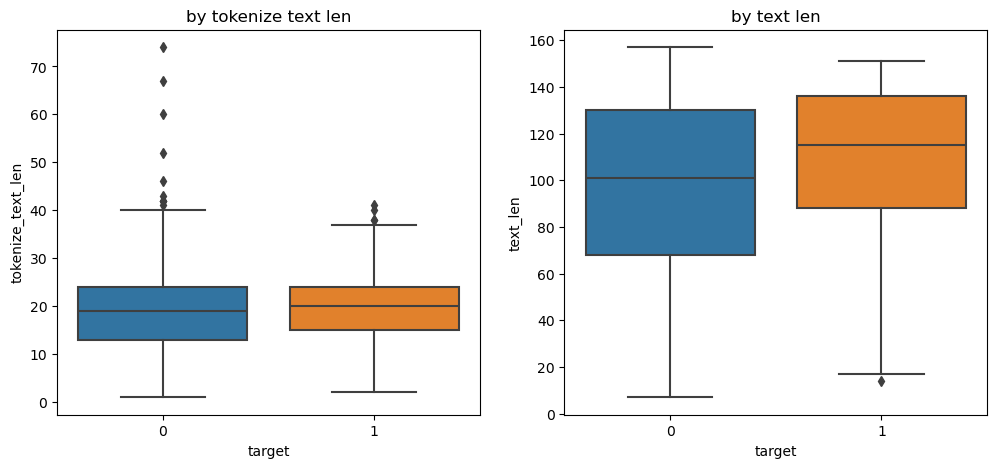

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=train[["target", "tokenize_text_len"]], x="target", y="tokenize_text_len")
plt.title("by tokenize text len")
plt.subplot(1,2,2)
sns.boxplot(data=train[["target", "text_len"]], x="target", y="text_len")
plt.title("by text len")
plt.show()

#### keyword, location에 따른 y

In [46]:
# train["keyword"].unique()
# list(train["location"].unique())

In [44]:
for loc in train["location"].unique():
    single_loc = train[train["location"] == loc]
    print(f"{loc} ")
    print("     target이 1인 비율 :", single_loc["target"].sum() / len(single_loc["target"]))
    print("     전체 수           :", len(single_loc["target"]))    

nan 
     target이 1인 비율 : nan
     전체 수           : 0
Birmingham 
     target이 1인 비율 : 0.75
     전체 수           : 4
Est. September 2012 - Bristol 
     target이 1인 비율 : 0.0
     전체 수           : 1
AFRICA 
     target이 1인 비율 : 1.0
     전체 수           : 1
Philadelphia, PA 
     target이 1인 비율 : 0.5
     전체 수           : 4
London, UK 
     target이 1인 비율 : 0.5
     전체 수           : 10
Pretoria 
     target이 1인 비율 : 0.0
     전체 수           : 2
World Wide!! 
     target이 1인 비율 : 1.0
     전체 수           : 1
Paranaque City 
     target이 1인 비율 : 0.0
     전체 수           : 1
Live On Webcam 
     target이 1인 비율 : 0.0
     전체 수           : 2
milky way 
     target이 1인 비율 : 0.0
     전체 수           : 1
GREENSBORO,NORTH CAROLINA 
     target이 1인 비율 : 1.0
     전체 수           : 1
England. 
     target이 1인 비율 : 0.0
     전체 수           : 1
Sheffield Township, Ohio 
     target이 1인 비율 : 1.0
     전체 수           : 1
India 
     target이 1인 비율 : 0.8333333333333334
     전체 수           : 24
Barbados 
     target이 1

C:\Users\ghckd\AppData\Local\Temp\ipykernel_19168\440984072.py:4: RuntimeWarning: invalid value encountered in scalar divide
  print("     target이 1인 비율 :", single_loc["target"].sum() / len(single_loc["target"]))


Burbank,CA 
     target이 1인 비율 : 1.0
     전체 수           : 1
?  
     target이 1인 비율 : 0.0
     전체 수           : 2
Spokane, Washington 
     target이 1인 비율 : 1.0
     전체 수           : 1
Charlotte, NC 
     target이 1인 비율 : 0.3333333333333333
     전체 수           : 6
Our Empire State 
     target이 1인 비율 : 1.0
     전체 수           : 1
Jerusalem 
     target이 1인 비율 : 0.5
     전체 수           : 2
Kingston, Pennsylvania 
     target이 1인 비율 : 0.0
     전체 수           : 1
Milwaukee, WI 
     target이 1인 비율 : 0.3333333333333333
     전체 수           : 3
Zero Branco 
     target이 1인 비율 : 0.0
     전체 수           : 1
bajaur 
     target이 1인 비율 : 1.0
     전체 수           : 1
Eldoret, kenya 
     target이 1인 비율 : 1.0
     전체 수           : 2
ÛÊÛÊÛÊ 
     target이 1인 비율 : 1.0
     전체 수           : 1
Miami,FL 
     target이 1인 비율 : 1.0
     전체 수           : 1
Los Angeles, CA 
     target이 1인 비율 : 0.3076923076923077
     전체 수           : 26
North-East Region, Singapore 
     target이 1인 비율 : 0.0
     전체 수         

In [45]:
for loc in train["keyword"].unique():
    single_loc = train[train["keyword"] == loc]
    print(f"{loc} ")
    print("     target이 1인 비율 :", single_loc["target"].sum() / len(single_loc["target"]))
    print("     전체 수           :", len(single_loc["target"]))  

nan 
     target이 1인 비율 : nan
     전체 수           : 0
ablaze 
     target이 1인 비율 : 0.3611111111111111
     전체 수           : 36
accident 
     target이 1인 비율 : 0.6857142857142857
     전체 수           : 35
aftershock 
     target이 1인 비율 : 0.0
     전체 수           : 34
airplane%20accident 
     target이 1인 비율 : 0.8571428571428571
     전체 수           : 35
ambulance 
     target이 1인 비율 : 0.5263157894736842
     전체 수           : 38
annihilated 
     target이 1인 비율 : 0.3235294117647059
     전체 수           : 34
annihilation 
     target이 1인 비율 : 0.3448275862068966
     전체 수           : 29
apocalypse 
     target이 1인 비율 : 0.28125
     전체 수           : 32
armageddon 
     target이 1인 비율 : 0.11904761904761904
     전체 수           : 42
army 
     target이 1인 비율 : 0.14705882352941177
     전체 수           : 34
arson 
     target이 1인 비율 : 0.6875
     전체 수           : 32
arsonist 
     target이 1인 비율 : 0.23529411764705882
     전체 수           : 34
attack 
     target이 1인 비율 : 0.6944444444444444
     전체 수        

C:\Users\ghckd\AppData\Local\Temp\ipykernel_19168\1797228373.py:4: RuntimeWarning: invalid value encountered in scalar divide
  print("     target이 1인 비율 :", single_loc["target"].sum() / len(single_loc["target"]))


whirlwind 
     target이 1인 비율 : 0.358974358974359
     전체 수           : 39
wild%20fires 
     target이 1인 비율 : 0.8709677419354839
     전체 수           : 31
wildfire 
     target이 1인 비율 : 0.8787878787878788
     전체 수           : 33
windstorm 
     target이 1인 비율 : 0.4
     전체 수           : 40
wounded 
     target이 1인 비율 : 0.7027027027027027
     전체 수           : 37
wounds 
     target이 1인 비율 : 0.30303030303030304
     전체 수           : 33
wreck 
     target이 1인 비율 : 0.1891891891891892
     전체 수           : 37
wreckage 
     target이 1인 비율 : 1.0
     전체 수           : 39
wrecked 
     target이 1인 비율 : 0.07692307692307693
     전체 수           : 39
